<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.728805,96.170392,-2.192705,199.706492,197.614973,2.091518
1,0.0,1.0,89.824242,66.942047,7.780447,174.546737,164.267650,10.279087
2,0.0,2.0,82.482057,22.683156,-11.888561,103.276651,115.249813,-11.973162
3,0.0,3.0,85.878367,53.555976,0.136727,149.571070,147.847114,1.723956
4,0.0,4.0,68.834220,35.235312,-3.726818,110.342714,114.607817,-4.265103
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.329689,92.676220,6.045659,205.051568,200.695810,4.355758
119996,999.0,116.0,86.168932,55.333289,-10.737888,140.764334,153.016276,-12.251942
119997,999.0,117.0,51.055408,93.650294,-14.627936,140.077766,152.598490,-12.520724
119998,999.0,118.0,80.982974,48.586678,-1.811382,137.758269,140.772252,-3.013982


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.728805,96.170392,-2.192705,199.706492,197.614973,2.091518
1,0.0,1.0,89.824242,66.942047,7.780447,174.546737,164.267650,10.279087
2,0.0,2.0,82.482057,22.683156,-11.888561,103.276651,115.249813,-11.973162
3,0.0,3.0,85.878367,53.555976,0.136727,149.571070,147.847114,1.723956
4,0.0,4.0,68.834220,35.235312,-3.726818,110.342714,114.607817,-4.265103
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.329689,92.676220,6.045659,205.051568,200.695810,4.355758
119996,999.0,116.0,86.168932,55.333289,-10.737888,140.764334,153.016276,-12.251942
119997,999.0,117.0,51.055408,93.650294,-14.627936,140.077766,152.598490,-12.520724
119998,999.0,118.0,80.982974,48.586678,-1.811382,137.758269,140.772252,-3.013982


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    95.728805  96.170392  -2.192705  199.706492  197.614973   
      1.0    89.824242  66.942047   7.780447  174.546737  164.267650   
      2.0    82.482057  22.683156 -11.888561  103.276651  115.249813   
      3.0    85.878367  53.555976   0.136727  149.571070  147.847114   
      4.0    68.834220  35.235312  -3.726818  110.342714  114.607817   
...                ...        ...        ...         ...         ...   
999.0 115.0  96.329689  92.676220   6.045659  205.051568  200.695810   
      116.0  86.168932  55.333289 -10.737888  140.764334  153.016276   
      117.0  51.055408  93.650294 -14.627936  140.077766  152.598490   
      118.0  80.982974  48.586678  -1.811382  137.758269  140.772252   
      119.0  47.076493  38.385425   7.885557  103.347475   94.017629   

                 e_hat  
rep   index             
0.0   0.0     2.091518  
      1.0    10.279087  
      2.0   -11.973162  
      3.0     1.723956  
      4.0    -4.265103  
...                ...  
999.0 115.0   4.355758  
      116.0 -12.251942  
      117.0 -12.520724  
      118.0  -3.013982  
      119.0   9.329846  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    95.728805  96.170392  -2.192705  199.706492  197.614973   
      1.0    89.824242  66.942047   7.780447  174.546737  164.267650   
      2.0    82.482057  22.683156 -11.888561  103.276651  115.249813   
      3.0    85.878367  53.555976   0.136727  149.571070  147.847114   
      4.0    68.834220  35.235312  -3.726818  110.342714  114.607817   
...                ...        ...        ...         ...         ...   
999.0 115.0  96.329689  92.676220   6.045659  205.051568  200.695810   
      116.0  86.168932  55.333289 -10.737888  140.764334  153.016276   
      117.0  51.055408  93.650294 -14.627936  140.077766  152.598490   
      118.0  80.982974  48.586678  -1.811382  137.758269  140.772252   
      119.0  47.076493  38.385425   7.885557  103.347475   94.017629   

                 e_hat  
rep   index             
0.0   0.0     2.091518  
      1.0    10.279087  
      2.0   -11.973162  
      3.0     1.723956  
      4.0    -4.265103  
...                ...  
999.0 115.0   4.355758  
      116.0 -12.251942  
      117.0 -12.520724  
      118.0  -3.013982  
      119.0   9.329846  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.728805,96.170392,-2.192705,199.706492,197.614973,2.091518
1,0.0,1.0,89.824242,66.942047,7.780447,174.546737,164.267650,10.279087
2,0.0,2.0,82.482057,22.683156,-11.888561,103.276651,115.249813,-11.973162
3,0.0,3.0,85.878367,53.555976,0.136727,149.571070,147.847114,1.723956
4,0.0,4.0,68.834220,35.235312,-3.726818,110.342714,114.607817,-4.265103
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.329689,92.676220,6.045659,205.051568,200.695810,4.355758
119996,999.0,116.0,86.168932,55.333289,-10.737888,140.764334,153.016276,-12.251942
119997,999.0,117.0,51.055408,93.650294,-14.627936,140.077766,152.598490,-12.520724
119998,999.0,118.0,80.982974,48.586678,-1.811382,137.758269,140.772252,-3.013982


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    95.728805  96.170392  -2.192705  199.706492  197.614973   
      1.0    89.824242  66.942047   7.780447  174.546737  164.267650   
      2.0    82.482057  22.683156 -11.888561  103.276651  115.249813   
      3.0    85.878367  53.555976   0.136727  149.571070  147.847114   
      4.0    68.834220  35.235312  -3.726818  110.342714  114.607817   
...                ...        ...        ...         ...         ...   
999.0 115.0  96.329689  92.676220   6.045659  205.051568  200.695810   
      116.0  86.168932  55.333289 -10.737888  140.764334  153.016276   
      117.0  51.055408  93.650294 -14.627936  140.077766  152.598490   
      118.0  80.982974  48.586678  -1.811382  137.758269  140.772252   
      119.0  47.076493  38.385425   7.885557  103.347475   94.017629   

                 e_hat  
rep   index             
0.0   0.0     2.091518  
      1.0    10.279087  
      2.0   -11.973162  
      3.0     1.723956  
      4.0    -4.265103  
...                ...  
999.0 115.0   4.355758  
      116.0 -12.251942  
      117.0 -12.520724  
      118.0  -3.013982  
      119.0   9.329846  

[120000 rows x 6 columns]

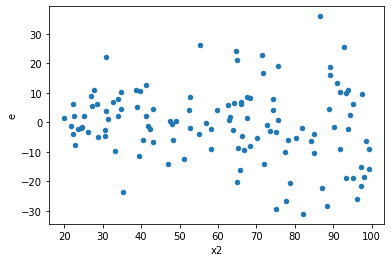

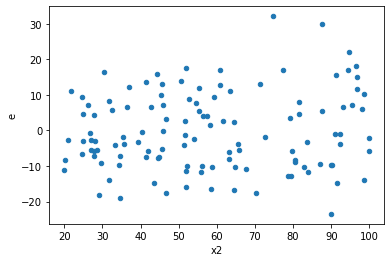

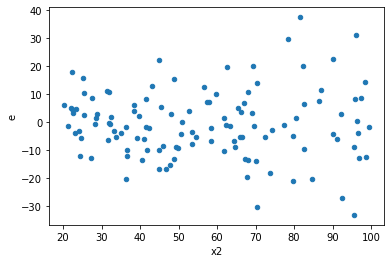

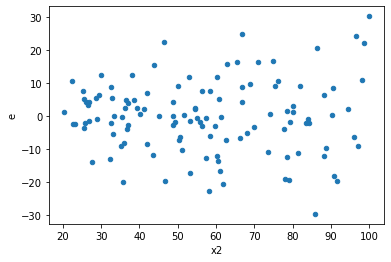

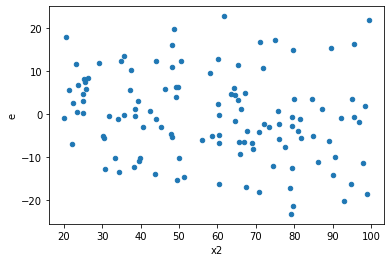

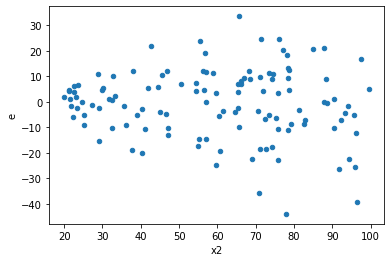

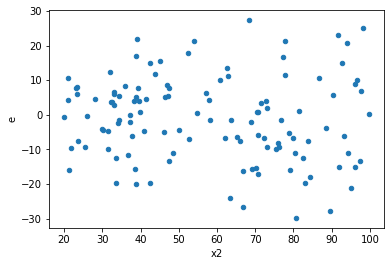

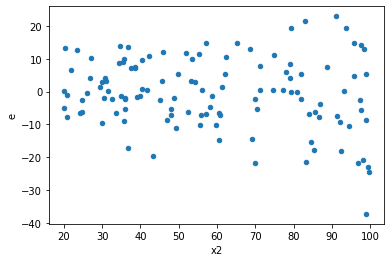

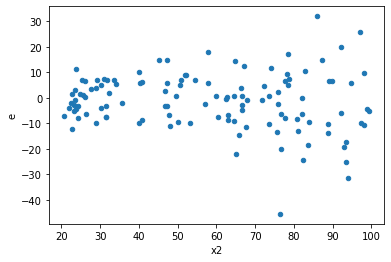

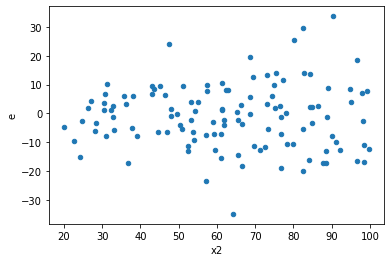

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,4849.354326918983,7083.718425297609,105.4207462373692,153.9938788108176,1.4607549681357723,0.20253716558076906,0.8987314172096155,0.10126858279038453,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,6061.094199362717,9108.270104087584,131.76291737745035,198.00587182799094,1.502743531860181,0.1709891268325583,0.9145054365837209,0.08549456341627915,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,3282.864631255686,11677.202650213952,71.36662241860188,253.85223152639028,3.557016192211208,3.344178719033586e-05,0.9999832791064048,1.672089359516793e-05,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,4240.603101947733,8100.767327796208,92.1870239553855,176.10363756078712,1.9102866109010483,0.030423542070793008,0.9847882289646035,0.015211771035396504,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,3172.1959479639236,8319.156562965542,68.9607814774766,180.8512296296857,2.622522914546057,0.0014115685653894872,0.9992942157173053,0.0007057842826947436,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,2764.0976821349914,9055.7249896443,60.08908004641285,196.86358673139785,3.276195717746723,9.857159278880978e-05,0.9999507142036056,4.928579639440489e-05,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,4779.890333638894,8006.8315370564105,103.91065942693248,174.06155515340023,1.6751077908017338,0.08354248175468681,0.9582287591226566,0.04177124087734341,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,2815.8171039659974,7994.525714985997,61.21341530360864,173.7940372823043,2.8391494972190974,0.0005718270870895825,0.9997140864564552,0.00028591354354479126,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,5771.710811645995,6354.0636985774045,125.47197416621728,138.1318195342914,1.1008977937280493,0.74582410712227,0.627087946438865,0.372912053561135,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,4849.354326918983,7083.718425297609,105.4207462373692,153.9938788108176,1.4607549681357723,0.20253716558076906,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,6061.094199362717,9108.270104087584,131.76291737745035,198.00587182799094,1.502743531860181,0.1709891268325583,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,3282.864631255686,11677.202650213952,71.36662241860188,253.85223152639028,3.557016192211208,3.344178719033586e-05,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,4240.603101947733,8100.767327796208,92.1870239553855,176.10363756078712,1.9102866109010483,0.030423542070793008,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,3172.1959479639236,8319.156562965542,68.9607814774766,180.8512296296857,2.622522914546057,0.0014115685653894872,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,2764.0976821349914,9055.7249896443,60.08908004641285,196.86358673139785,3.276195717746723,9.857159278880978e-05,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,4779.890333638894,8006.8315370564105,103.91065942693248,174.06155515340023,1.6751077908017338,0.08354248175468681,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,2815.8171039659974,7994.525714985997,61.21341530360864,173.7940372823043,2.8391494972190974,0.0005718270870895825,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,5771.710811645995,6354.0636985774045,125.47197416621728,138.1318195342914,1.1008977937280493,0.74582410712227,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    573
Reject005=1 : Homoscedasticity      427
Name: Result_test, dtype: int64